In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

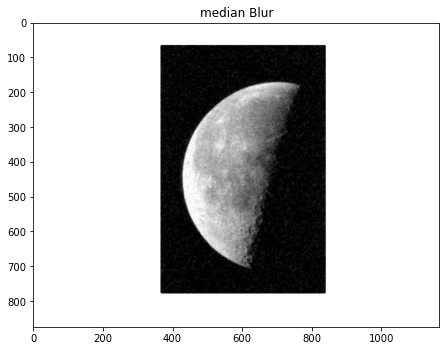

In [12]:
img = cv2.imread('Fig3noisymoon.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
median_img = cv2.medianBlur(img,5)
plt.figure(figsize = (16,6))
plt.subplot(121),plt.imshow(median_img,cmap ='gray'),plt.title('median Blur')

plt.show()

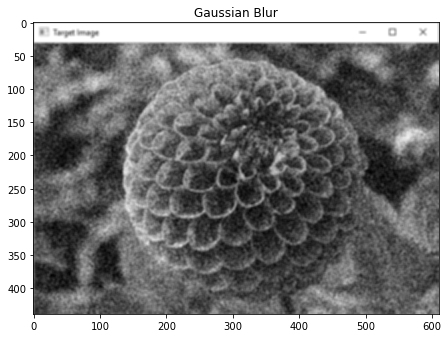

In [44]:
img = cv2.imread('noisy-grayscale.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
median_img = cv2.GaussianBlur(img,(5,5),2)
plt.figure(figsize = (16,6))
plt.subplot(121),plt.imshow(median_img,cmap ='gray'),plt.title('Gaussian Blur')

plt.show()

(<AxesSubplot:title={'center':'Harmonic mean'}>,
 Text(0.5, 1.0, 'Harmonic mean'))

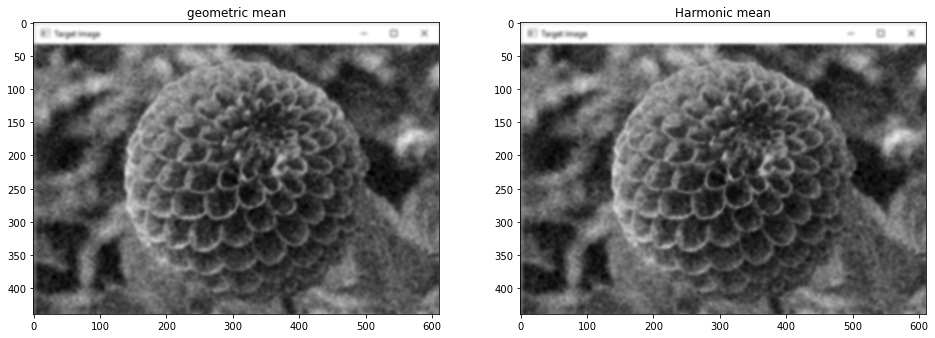

In [49]:
img2 = plt.imread('noisy-grayscale.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
kernel1 = np.ones((5,5),np.float32)/25
kernel2 = np.ones((11,11),np.float32)/121

I_avg_smooth1 = cv2.filter2D(img2,-1,kernel1)
I_avg_smooth2 = cv2.filter2D(img2,-1,kernel2)

rows,cols = img.shape
ksize = 5
padsize = int(ksize-1 / 2)
# img = cv2.GaussianBlur(I_avg_smooth1,(5,5),2)
img = I_avg_smooth1
pad_img = cv2.copyMakeBorder(img,*[padsize]*4, cv2.BORDER_DEFAULT)
geomean1 = np.zeros_like(img)
harmonicmean = np.zeros_like(img)
for r in range(rows):
    for c in range(cols):
        geomean1[r,c] = np.prod(pad_img[r:r+ksize,c:c+ksize]) ** (1/ksize**2)
        harmonicmean[r,c] = 1/np.sum(1/pad_img[r:r+ksize, c:c+ksize])
harmonicmean *=(ksize**2)
# print(geomean1)

# plt.imshow(pad_img,cmap = 'gray')
plt.figure(figsize=(16,6))
plt.subplot(121),plt.imshow(geomean1,cmap='gray'),plt.title('geometric mean')
plt.subplot(122),plt.imshow(harmonicmean,cmap='gray'),plt.title('Harmonic mean')

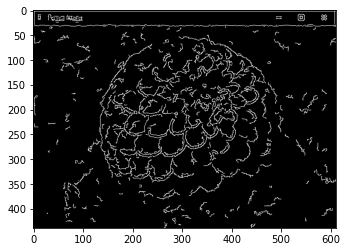

In [52]:
img = cv2.imread('noisy-grayscale.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_gauss = cv2.GaussianBlur(img, (5,5),3,cv2.BORDER_DEFAULT)
canny_edge = cv2.Canny(img_gauss,100,200)
plt.imshow(canny_edge,cmap='gray')

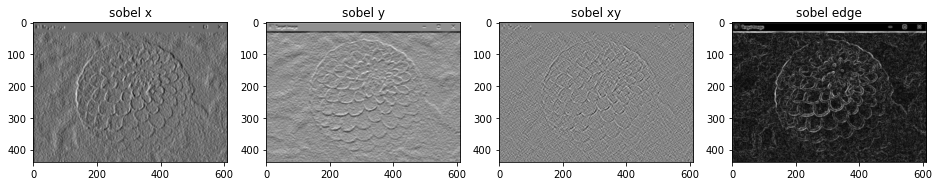

In [55]:
img = cv2.imread('noisy-grayscale.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
I_gaussian_blur1 = cv2.GaussianBlur(img, (5,5),3,cv2.BORDER_DEFAULT)

sobelx = cv2.Sobel(src=I_gaussian_blur1, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=3) # Sobel Edge Detection on the X axis

sobely = cv2.Sobel(src=I_gaussian_blur1, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=3) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=I_gaussian_blur1, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=3) # Combine
sobeledge = np.sqrt(sobelx**2 + sobely**2)
plt.figure(figsize=(16, 16))

plt.subplot(1,4,1),
plt.imshow(sobelx,cmap = 'gray')
plt.title('sobel x')

plt.subplot(1,4,2),
plt.imshow(sobely,cmap = 'gray')
plt.title('sobel y')


plt.subplot(1,4,3),
plt.imshow(sobelxy,cmap = 'gray')
plt.title('sobel xy')

plt.subplot(1,4,4),
plt.imshow(sobeledge,cmap = 'gray')
plt.title('sobel edge')

plt.show()

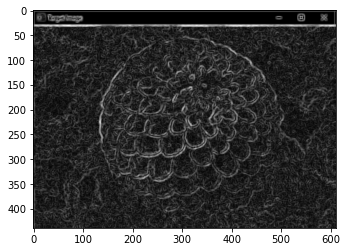

In [56]:
plt.imshow(sobeledge,cmap = 'gray')

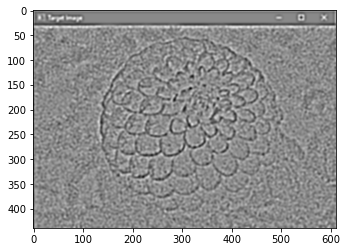

In [61]:
ksize = 19
laplace_img = cv2.Laplacian(I_gaussian_blur1,cv2.CV_64F,ksize = ksize)
plt.imshow(laplace_img,cmap = 'gray')

## Thresholding

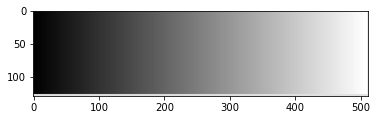

In [8]:
img = cv2.imread('grayscale.png')
img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(img,cmap = 'gray')

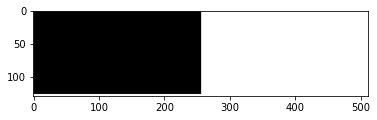

In [14]:
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
plt.imshow(thresh1,'gray')

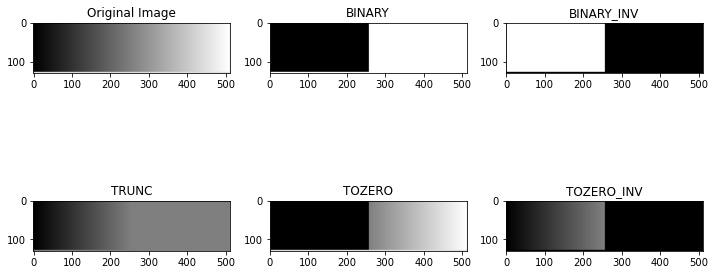

In [26]:
import cv2 as cv
img = cv.imread('grayscale.png',0)
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = [12,6])
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
#     plt.xticks([]),plt.yticks([])    

### Adaptive thresholding

In [31]:
import cv2 as cv

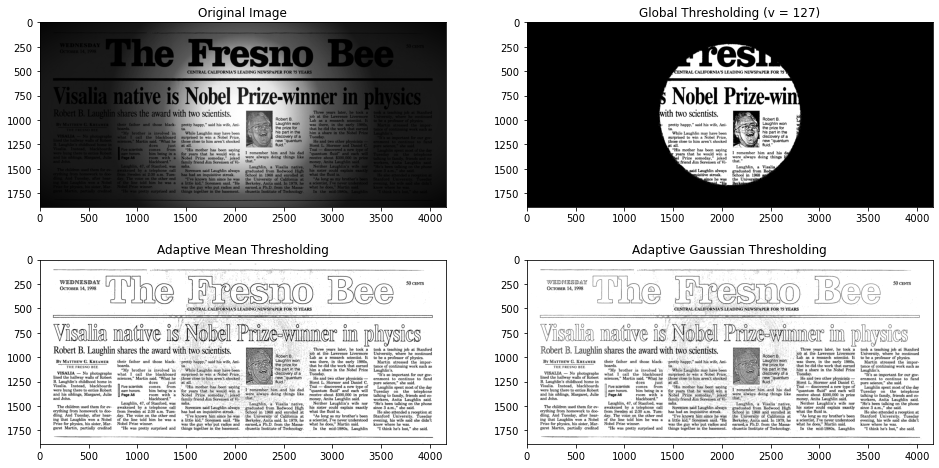

In [35]:
img = cv.imread('vignette.jpg')
img = cv.cvtColor(img,cv2.COLOR_RGB2GRAY)
# img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
plt.figure(figsize =(16,8))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
#     plt.xticks([]),plt.yticks([])
plt.show()

### OTSU thresholding

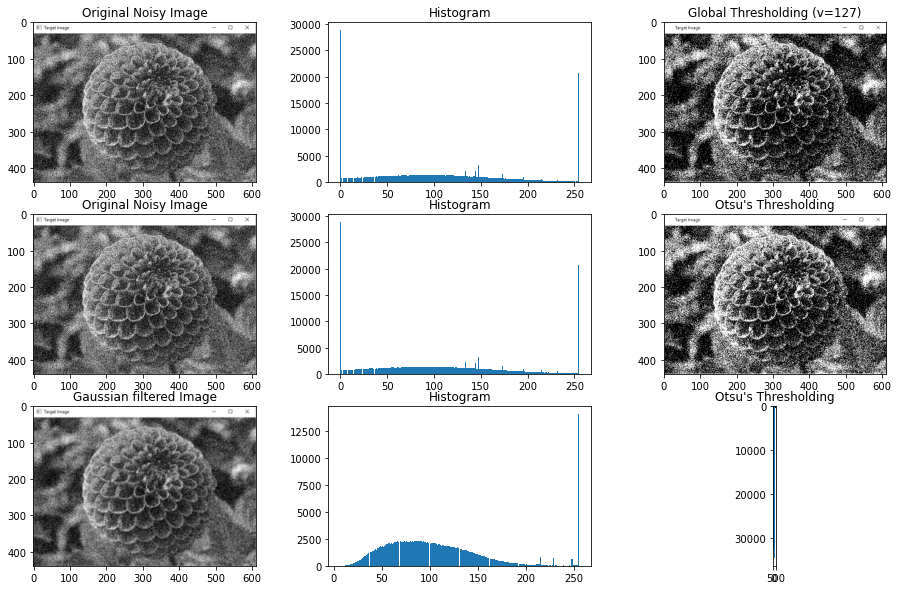

In [112]:
img = cv.imread('noisy-grayscale.png')
img = cv.cvtColor(img,cv2.COLOR_RGB2GRAY)
# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
plt.figure(figsize =(16,10))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]),# plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]),# plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]),# plt.xticks([]), plt.yticks([])
    
plt.hist(thresh1.ravel(),2)
plt.show()

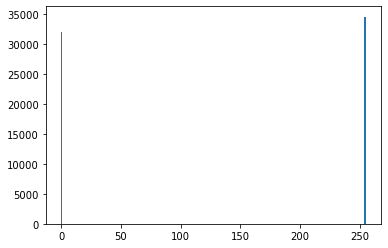

In [114]:
plt.hist(thresh1.ravel(),256)
plt.show()

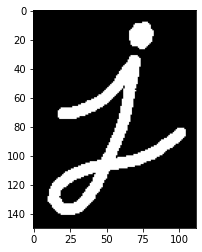

In [128]:
img = cv.imread('j.png')
# img = cv.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(img)

## Morphological 

### Erosion

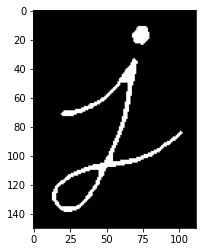

In [129]:
kernal = np.ones((5,5))
# kernal = kernal/kernal.sum() We dont do that here
erosion = cv.erode(img,kernal,1)
plt.imshow(erosion)

### dialate

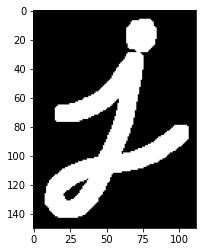

In [130]:
dilate = cv.dilate(img,kernal,1)
plt.imshow(dilate)

(150, 112)

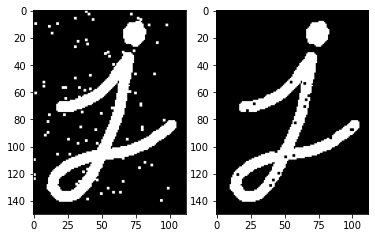

In [170]:
img_o = cv.cvtColor(img,cv2.COLOR_RGB2GRAY)
img_c = cv.cvtColor(img,cv2.COLOR_RGB2GRAY)
for i,j in zip(np.random.randint(140,size = 100),np.random.randint(100,size = 100)):
    img_o[i:i+2,j:j+2] = 255
    img_c[i:i+2,j:j+2] = 0
plt.subplot(121),plt.imshow(img_o,'gray')
plt.subplot(122),plt.imshow(img_c,'gray')
img_o.shape

### OPening and closing

Text(0.5, 1.0, 'Opening')

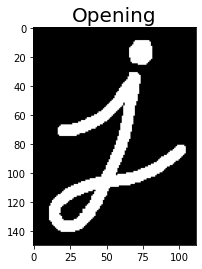

In [171]:
opening = cv.morphologyEx(img_o,cv.MORPH_OPEN,kernal)
plt.imshow(opening,'gray')
plt.title('Opening',fontsize = 20)

Text(0.5, 1.0, 'Closing')

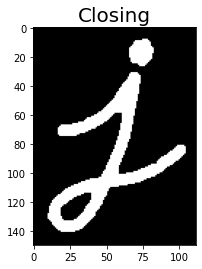

In [173]:
opening = cv.morphologyEx(img_c,cv.MORPH_CLOSE,kernal)
plt.imshow(opening,'gray')
plt.title('Closing',fontsize = 20)

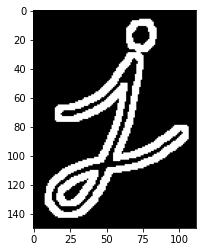

In [176]:
# Morphological gradient
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernal)
plt.imshow(gradient,'gray')

### Hit or miss

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x16858218be0>)

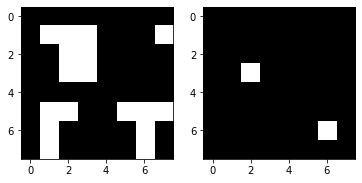

In [214]:
input_image = np.array((
    [0, 0,   0,   0,   0, 0,  0,   0],
    [0, 255, 255, 255, 0, 0,  0,   255],
    [0, 0,   255, 255, 0, 0,  0,   0],
    [0, 0,   255, 255, 0, 0,  0,   0],
    [0, 0,   0,   0,   0, 0,  0,   0],
    [0, 255, 255, 0,   0, 255,255, 255],
    [0, 255, 0,   0,   0, 0,  255, 0],
    [0, 255, 0,   0,   0, 0,  255, 0]), dtype="uint8")
plt.subplot(121),plt.imshow(input_image,'gray')
kernel1 = np.array((
        [-1, 1, 0],
        [0,  1,  1],
        [0,  0, -1]), dtype="int")
kernel2 = np.array((
        [1, 1, 1],
        [0, 1, -1],
        [0, 1, -1]), dtype="int")
output_image2 = cv.morphologyEx(input_image, cv.MORPH_HITMISS, kernel2)
output_image1 = cv.morphologyEx(input_image, cv.MORPH_HITMISS, kernel1)
plt.subplot(122),plt.imshow(output_image2 | output_image1,'gray')

### Thinning

In [217]:
from skimage.morphology import thin,skeletonize

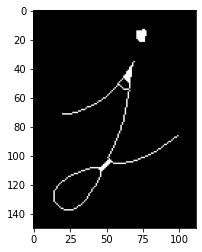

In [225]:
img = cv.imread('j.png')
img = cv.cvtColor(img,cv2.COLOR_RGB2GRAY)
# plt.imshow(img)
img_thin = thin(img,5)
plt.imshow(img_thin,'gray')

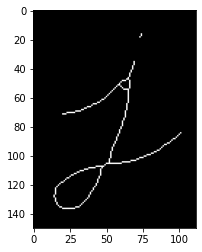

In [243]:
img = cv.imread('j.png')
img = cv.cvtColor(img,cv2.COLOR_RGB2GRAY)
img = cv.threshold(img,127,1,cv.THRESH_BINARY)[1]
img_skel = skeletonize(img)
plt.imshow(img_skel,'gray')

### Thicknning
THicknning is dual of thinnig so its done by thinning the background

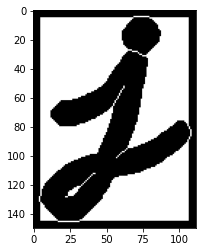

In [282]:
import skimage
img = cv.imread('j.png')
img = cv.cvtColor(img,cv2.COLOR_RGB2GRAY)
img = np.invert(img)
img = cv.threshold(img,127,1,cv.THRESH_BINARY)[1]

img_thic = thin(img,5)
plt.imshow(img_thic,'gray')

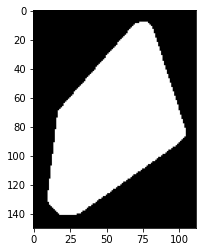

In [289]:
# Convex Hull
img = cv.imread('j.png')
img = cv.cvtColor(img,cv2.COLOR_RGB2GRAY)
img = cv.threshold(img,127,1,cv.THRESH_BINARY)[1]
img_chull = skimage.morphology.convex_hull_image(img)
plt.imshow(img_chull,'gray')

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x1685f1a5220>)

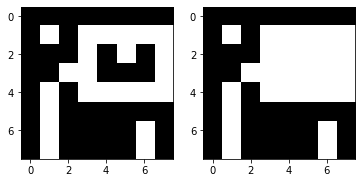

In [316]:
import scipy.ndimage as spi
# Hole filling
input_image = np.array((
    [0, 0,   0,   0,   0, 0,  0,   0],
    [0, 255, 0, 255, 255, 255,  255,   255],
    [0, 0,   0, 255, 0, 255,  0,   255],
    [0, 0,   255, 255, 0, 0,  0,   255],
    [0, 255,   0,   255,   255, 255,  255,   255],
    [0, 255, 0, 0,   0, 0,0, 0],
    [0, 255, 0,   0,   0, 0,  255, 0],
    [0, 255, 0,   0,   0, 0,  255, 0]), dtype="uint8")
out = spi.binary_fill_holes(input_image)
plt.subplot(121),plt.imshow(input_image,'gray')
plt.subplot(122),plt.imshow(out,'gray')

(<matplotlib.image.AxesImage at 0x16860e7ff10>, 5)

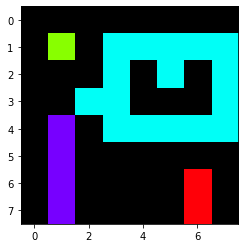

In [343]:
num_labels, labels = cv2.connectedComponents(input_image,connectivity = 4)
# plt.imshow(labels,'gray'),num_labels

# Map component labels to hue val, 0-179 is the hue range in OpenCV
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

# Converting cvt to BGR
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

# set bg label to black
labeled_img[label_hue==0] = 0
plt.imshow(cv2.cvtColor(labeled_img, cv2.COLOR_BGR2RGB)),num_labels

In [363]:
# THese two are same
skimage.measure.regionprops(labels)[1].centroid

(2.5, 4.8125)

In [364]:
retval, labels, stats, centroids = cv2.connectedComponentsWithStats(input_image,connectivity = 4)
centroids

array([[3.17073171, 3.6097561 ],
       [1.        , 1.        ],
       [4.8125    , 2.5       ],
       [1.        , 5.5       ],
       [6.        , 6.5       ]])

The Total Number of Contours in the Image = 
4


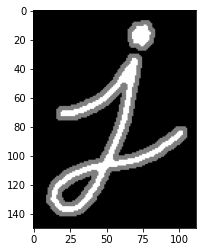

In [390]:
input_image = cv2.imread('j.png')
input_image = cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)
contours, hierarchy = cv2.findContours(input_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
# plt.imshow(contours[0])
print("The Total Number of Contours in the Image = ")
# //command len used to calculate the number of contours in the image
print (str(len(contours)))
# print(contours[0])
cv2.drawContours(input_image, contours, -1,(127),2)
# cv2.drawContours(imgray_1, contours, -1,(0,255,0),3)
# print (“The original image is: “ /n)
plt.imshow(input_image,'gray')
# cv2.imshow('Image GRAY', imgray_1)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

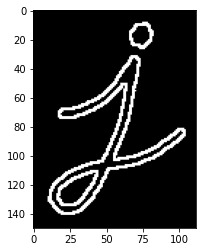

In [405]:
# Boundary detecction orginal - eroded

input_image = cv2.imread('j.png')
input_image = cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)
input_image = cv2.threshold(input_image,127,1,cv2.THRESH_BINARY)[1] # not necessary
kernal = np.ones((5,5))
# kernal = kernal/kernal.sum() We dont do that here
erosion = cv.erode(input_image,kernal,1)
plt.imshow(input_image-erosion,'gray')

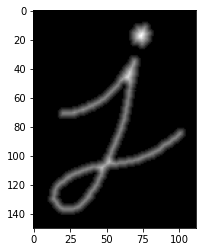

In [429]:
input_image = cv2.imread('j.png')
input_image = cv2.cvtColor(input_image,cv2.COLOR_BGR2GRAY)
# img_thic = thin(input_image,5)
out = cv2.distanceTransform(input_image,cv.DIST_L2,3)
plt.imshow(out,'gray')

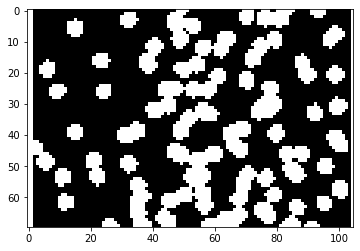

In [3]:
image = cv2.imread('Fig2.png',cv2.IMREAD_GRAYSCALE)
ret,img_b = cv2.threshold(image,100,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
plt.imshow(img_b,'gray')

In [5]:
num_labels,labels, stat, centroids = cv2.connectedComponentsWithStats(img_b,8)

In [9]:
import scipy.ndimage as ndimage

In [10]:
label_im, nb_labels = ndimage.label(img_b)

In [11]:
nb_labels 

44

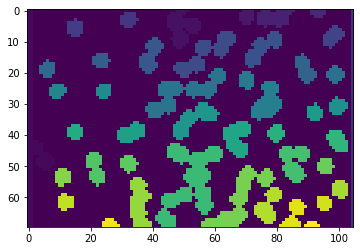

In [12]:
plt.imshow(label_im)

In [14]:
sizes = ndimage.sum(img_b, label_im, range(nb_labels + 1))
mean_vals = ndimage.sum(im, label_im, range(1, nb_labels + 1))

NameError: name 'im' is not defined